## Exercise 1 – Data Visualisation with Seaborn 

<Axes: xlabel='Industry', ylabel='Country'>

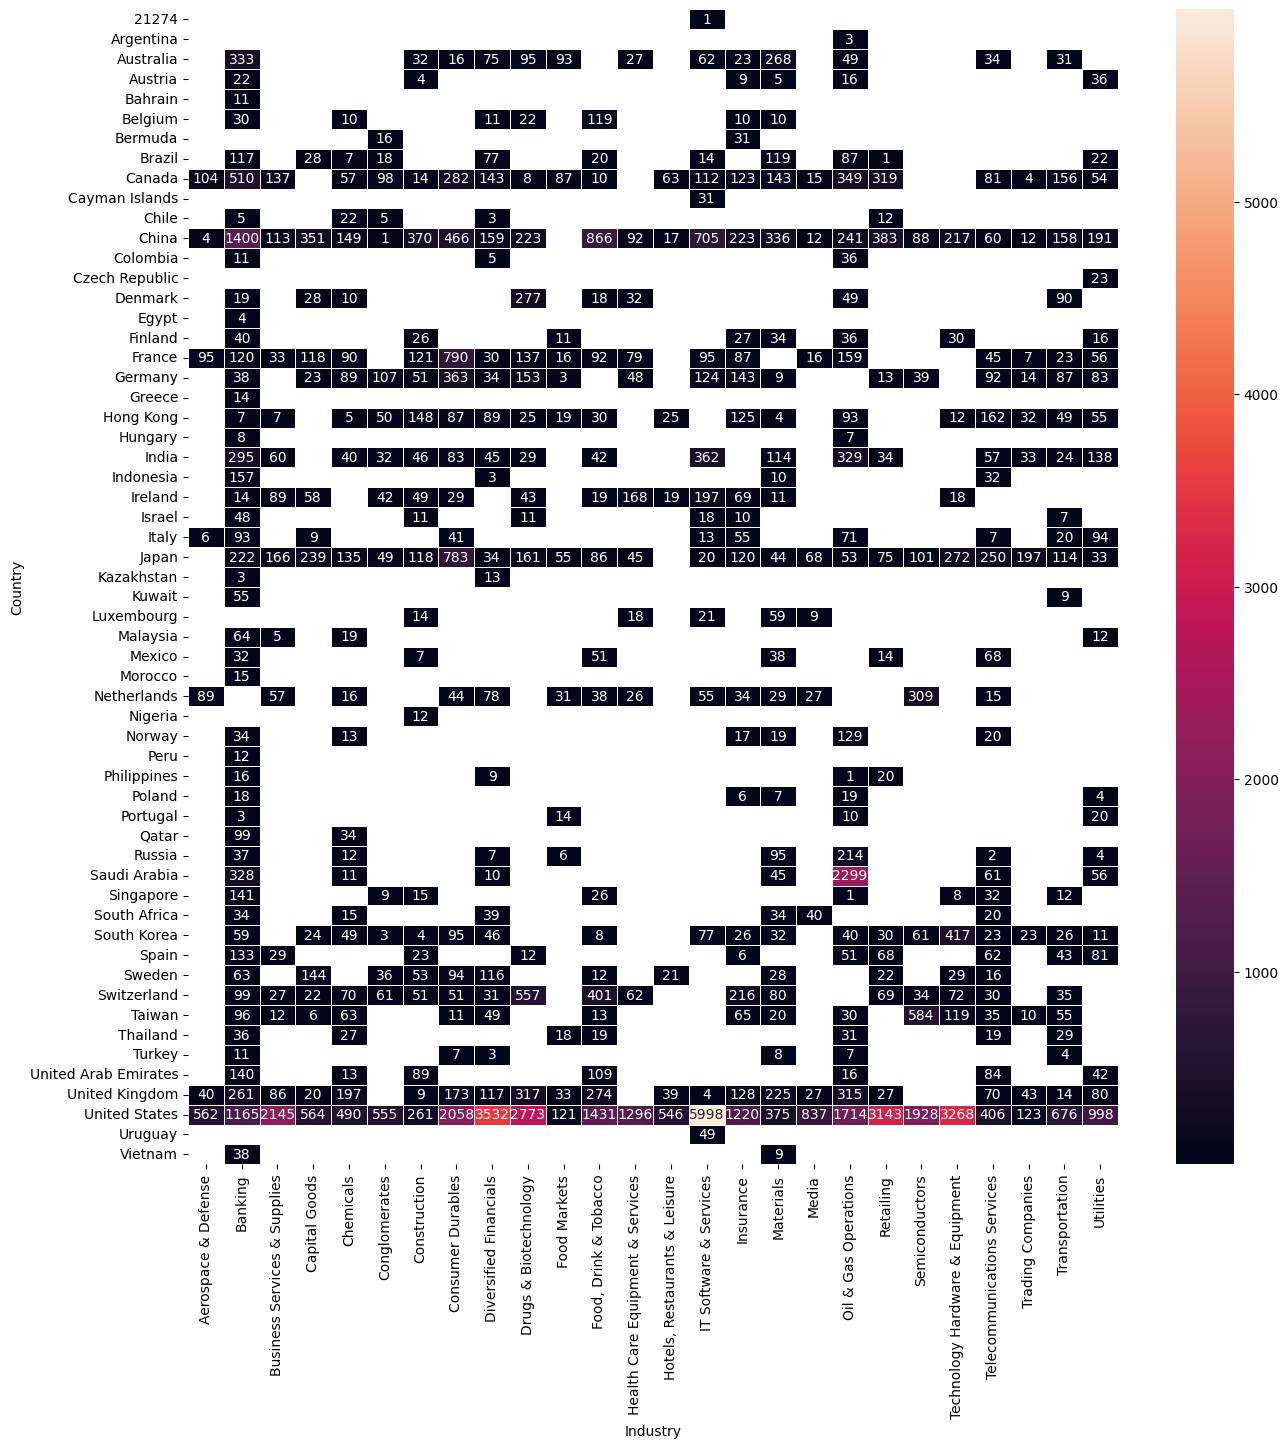

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the DataFrame with specified columns and data types
df_panel = pd.DataFrame({
    'Year': pd.Series(dtype='int'),
    'Rank_nr': pd.Series(dtype='int'),
    'Company': pd.Series(dtype='string'),
    'Industry': pd.Series(dtype='string'),
    'Country': pd.Series(dtype='string'),
    'Sales': pd.Series(dtype='int'),
    'Profits': pd.Series(dtype='float'),
    'Assets': pd.Series(dtype='int'),
    'Market_Value': pd.Series(dtype='int')
})

# Display the empty DataFrame
#df_panel

for year in range(2008, 2023):
    file_name = f'data/forbes-global-2000-2008-2019/Forbes Global 2000 - {year}.csv'
    df = pd.read_csv(file_name, encoding='ISO-8859-1') 

    df.insert(0,'Year',year)
    df_panel = pd.concat([df_panel,df], ignore_index=True)

df_panel.reset_index(drop=True, inplace=True)

df_panel_2022 = df_panel[df_panel.Year == 2022].copy()
df_panel_2022["Profits"]=df_panel_2022["Profits"].astype(float)
df_panel_2022["Market_Value"]=df_panel_2022["Market_Value"] / 1000
df_panel_2022

pvtTable = pd.pivot_table(df_panel_2022, index=['Country'], columns=['Industry'], values='Market_Value', aggfunc='sum')
fig, ax = plt.subplots(figsize=(15,15))
pvtTable
sns.heatmap(pvtTable, annot=True, fmt=".0f", xticklabels=True, yticklabels=True, linewidths=0.5, ax=ax)

## Exercise 2 – Data Visualisation with Matplotlib

<Axes: xlabel='Sex'>

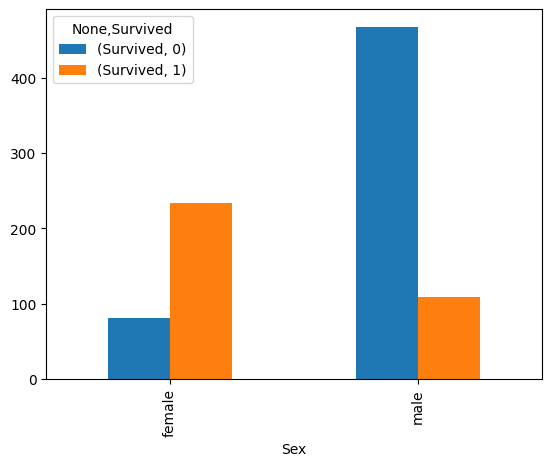

In [38]:
import pandas as pd
import matplotlib as plt

df =  pd.read_csv('data/titanic.csv')
#df

df.pivot_table(index='Sex', columns='Survived', aggfunc={'Survived':len}, fill_value=0).plot(kind='bar')


<Axes: xlabel='Pclass'>

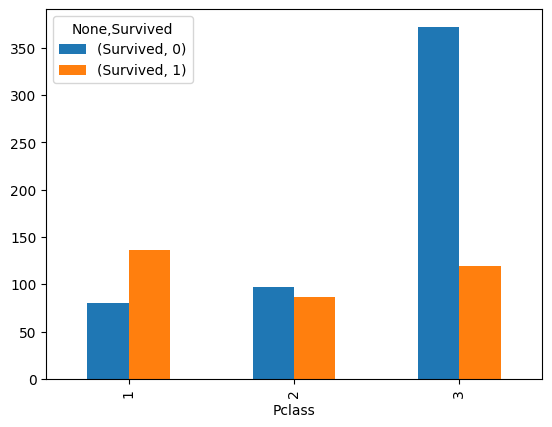

In [39]:
df.pivot_table(index='Pclass', columns='Survived', aggfunc={'Survived':len}, fill_value=0).plot(kind='bar')

<Axes: xlabel='Parch'>

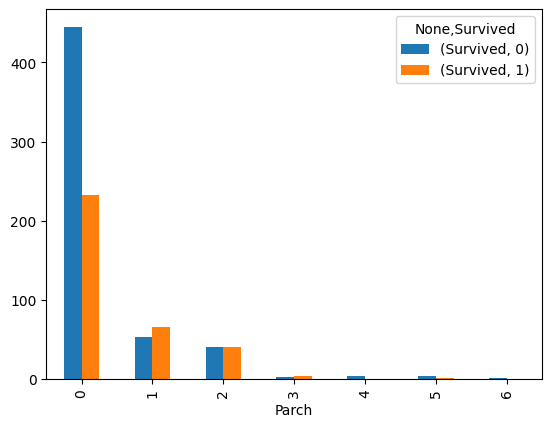

In [40]:
df.pivot_table(index='Parch', columns='Survived', aggfunc={'Survived':len}, fill_value=0).plot(kind='bar')

<Axes: xlabel='AgeGroup'>

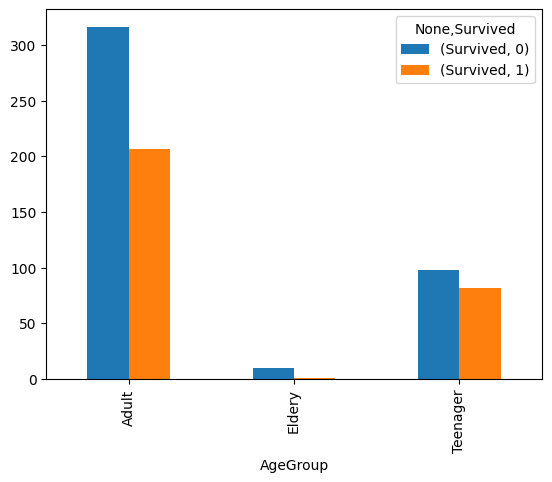

In [60]:
df.dropna(subset=['Age'],inplace=True)
#df.reset_index(inplace=True)


df['AgeGroup']=''

for i in range(len(df.index)):
    if df.loc[i,'Age'] < 13:
         df.loc[i, 'AgeGroup'] = 'Child'
    if df.loc[i,'Age'] < 21:        
        df.loc[i, 'AgeGroup'] = 'Teenager'    
    elif df.loc[i, 'Age'] < 65:        
        df.loc[i, 'AgeGroup'] = 'Adult'    
    else:        
        df.loc[i, 'AgeGroup'] = 'Eldery'

df.pivot_table(index='AgeGroup', columns='Survived', aggfunc={'Survived':len}, fill_value=0)
df.pivot_table(index='AgeGroup', columns='Survived', aggfunc={'Survived':len}, fill_value=0).plot(kind='bar')